In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
df_unscaled = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\Dataset-weather-prediction-dataset-processed.csv')

In [3]:
df_unsc = df_unscaled[df_unscaled['DATE'].astype(str).str.contains('199')]

In [8]:
# We exclude DATE and MONTH to be able to proceed with the analysis

df_unsc_temp = df_unsc[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']]

In [11]:
# We scale our dataset

features = df_unsc[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']]
scaled_temp = StandardScaler().fit_transform(features)

In [15]:
scaled_temp

array([[-1.75672027, -1.55739937, -1.34077122, ..., -0.49288886,
        -1.35320129, -1.13732223],
       [-1.71520182, -1.51211828, -1.39904148, ..., -0.82279267,
        -1.53550508, -1.02830575],
       [-1.77055976, -1.500798  , -1.41069554, ..., -1.01773582,
        -1.44435318, -0.89203514],
       ...,
       [-1.21698035, -1.18383034, -1.16596045, ..., -1.9924516 ,
        -1.24902769, -1.08281399],
       [-1.31385675, -1.37627499, -1.14265234, ..., -2.08242537,
        -1.83500416, -0.72851042],
       [-1.36921469, -1.46683718, -1.53889011, ..., -1.94746472,
        -2.09543814, -0.45596921]])

## Dendrograms with Unscaled data

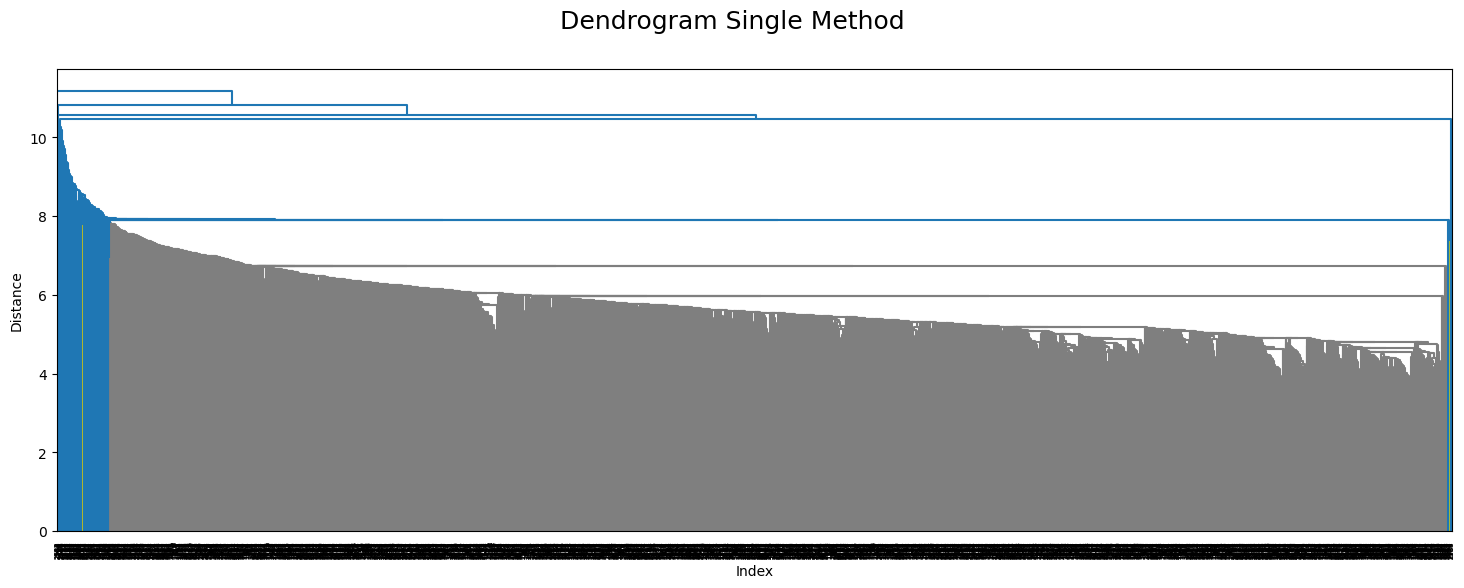

In [50]:
# Create the dendogram

temp_single = linkage(df_unsc_temp, method="single")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

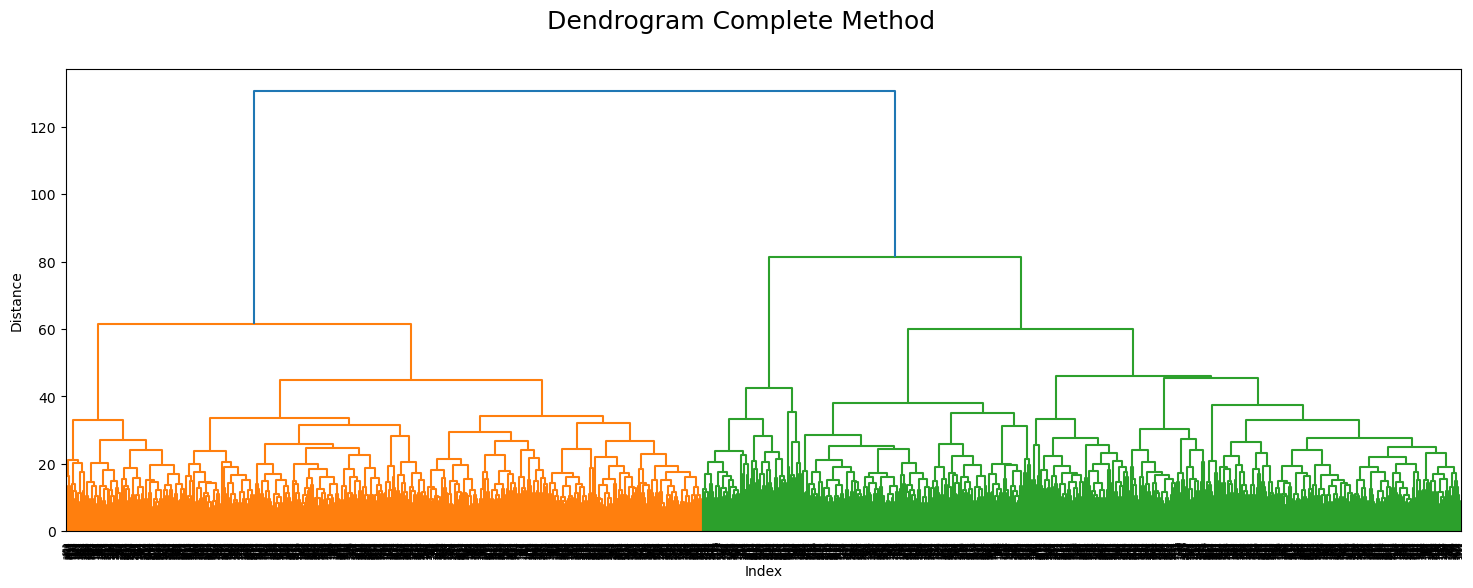

In [49]:
# Create the dendogram

temp_single = linkage(df_unsc_temp, method="complete")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

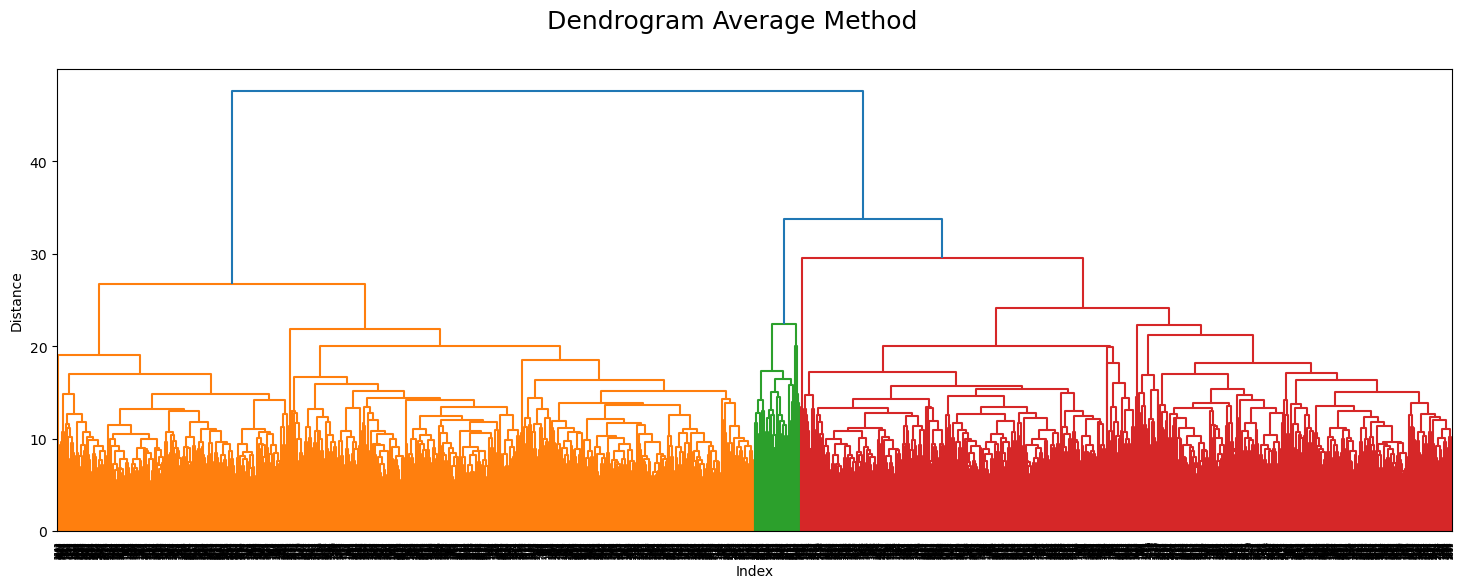

In [48]:
# Create the dendogram

temp_single = linkage(df_unsc_temp, method="average")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

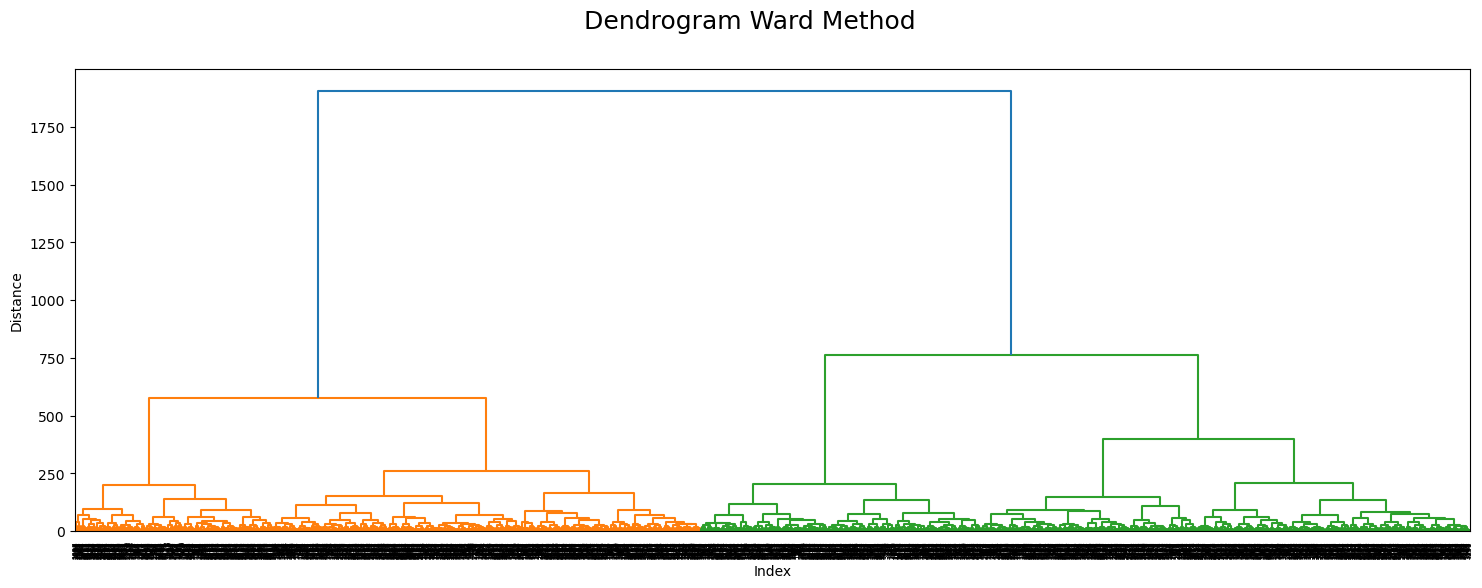

In [47]:
# Create the dendogram

temp_single = linkage(df_unsc_temp, method="ward")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## Dendrograms with Scaled Data

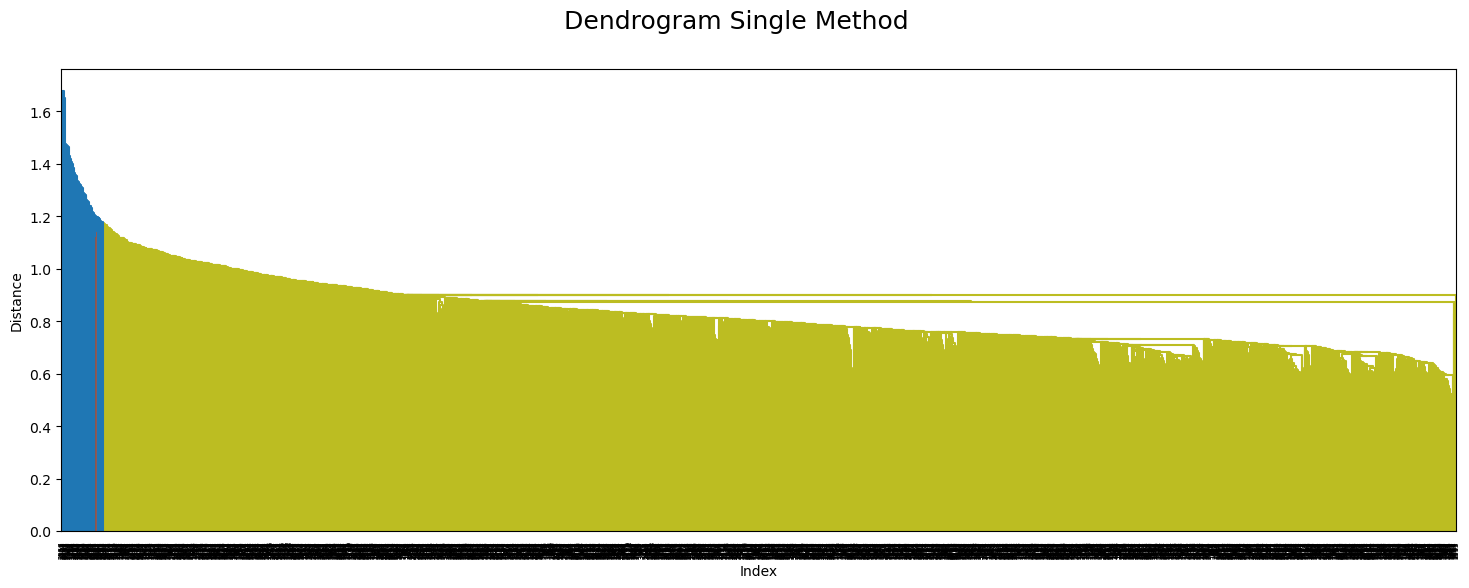

In [36]:
# Create the dendogram

temp_single = linkage(scaled_temp, method="single")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

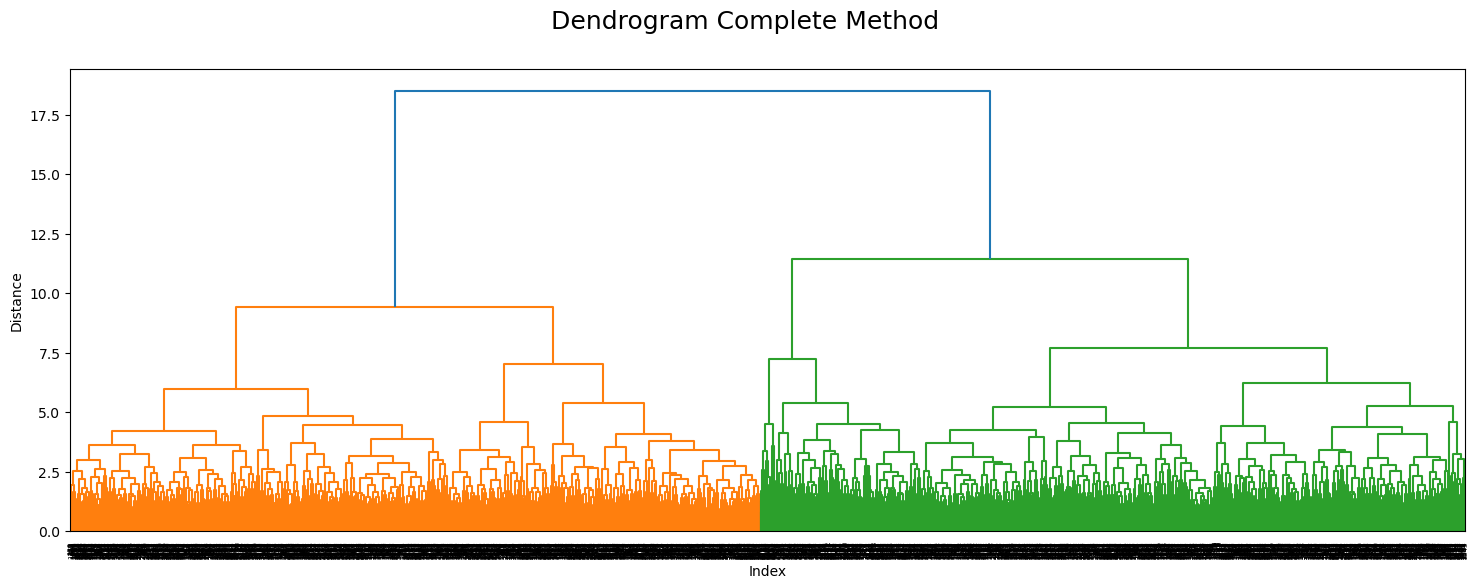

In [46]:
# Create the dendogram

temp_single = linkage(scaled_temp, method="complete")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

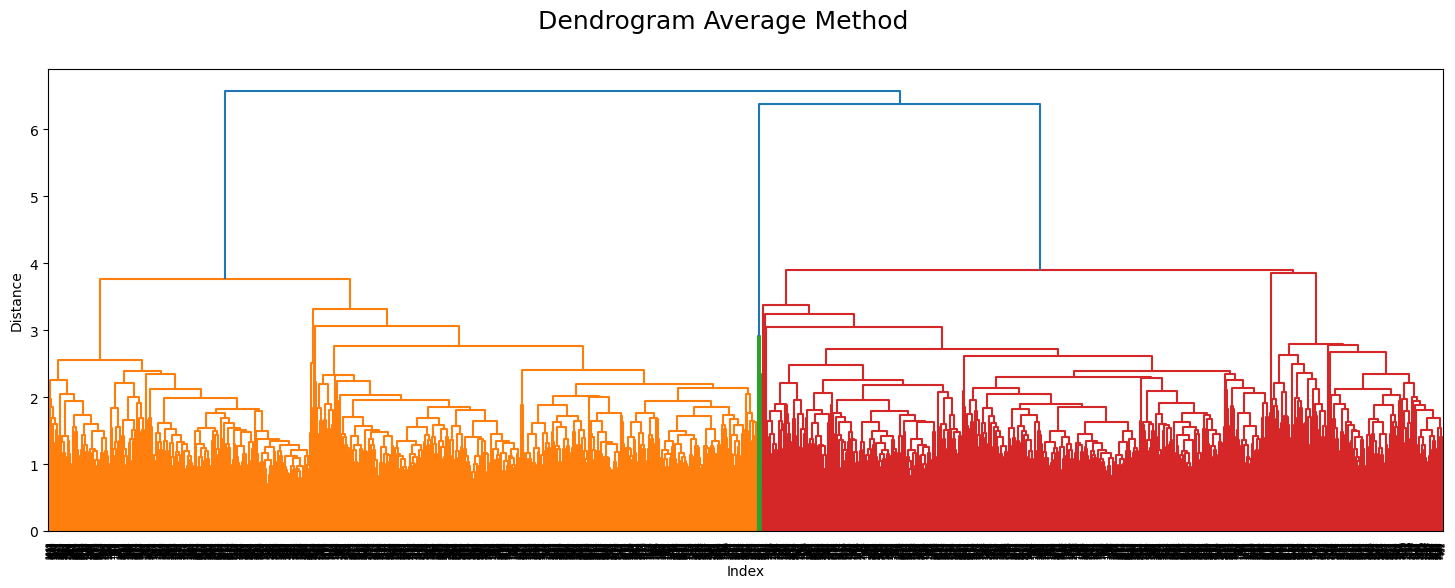

In [41]:
# Create the dendogram

temp_single = linkage(scaled_temp, method="average")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

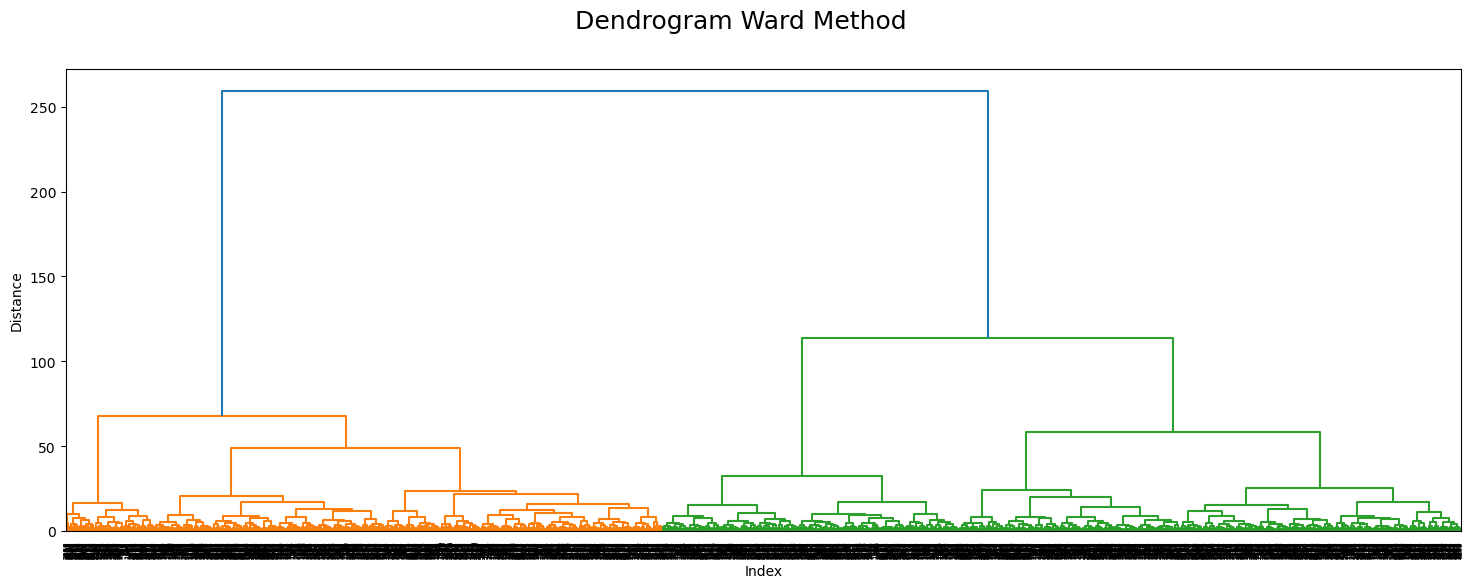

In [40]:
# Create the dendogram

temp_single = linkage(scaled_temp, method="ward")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## PCA

In [57]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_temp)

In [58]:
# Make a dtaframe for the new components

df_PCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [59]:
df_PCA

,PCA1,PCA2
0,-5.409186,0.065704
1,-5.290264,0.233459
2,-5.368028,0.173930
3,-5.422289,0.459121
4,-4.815516,1.298820
...,...,...
3647,-3.955520,-0.472918
3648,-4.631717,-0.297514
3649,-5.056594,0.132188
3650,-5.412513,0.341795


C:\Users\casbacar\AppData\Local\Temp\ipykernel_64976\2221882462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', data=df_PCA)


([<matplotlib.axis.XTick at 0x255e4d192e0>,
 [Text(0, 0, '-10.003464396893007'),
  Text(40, 0, '-7.206636997383471'),
  Text(80, 0, '-6.535955441053033'),
  Text(120, 0, '-6.093464538827663'),
  Text(149, 0, '-5.868257293170966')])

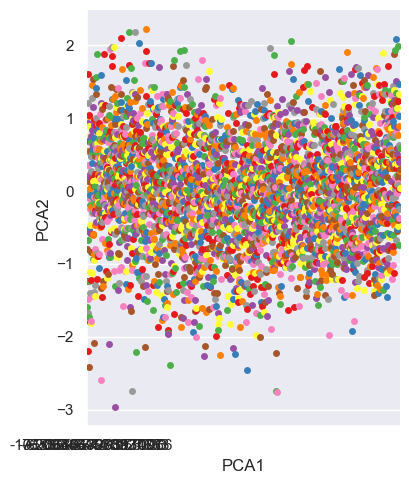

In [60]:
#PLot the two components, color coded weather stations
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', data=df_PCA)
plt.xticks([0, 40, 80, 120, 149])

In [64]:
# Export reduced dataset to CSV
df_PCA.to_csv('C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Unsupervised\\PCA_reduced_dataset.csv')

## Clustering with reduced dataset

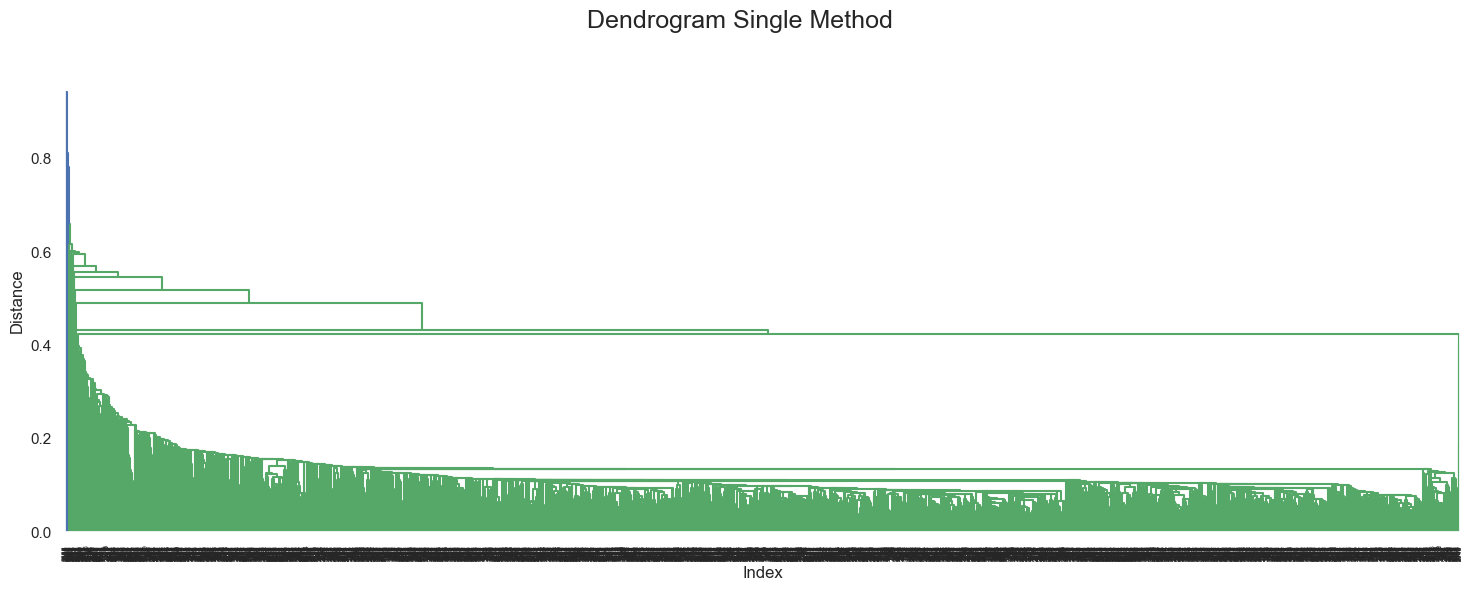

In [65]:
temp_single = linkage(df_PCA, method="single")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

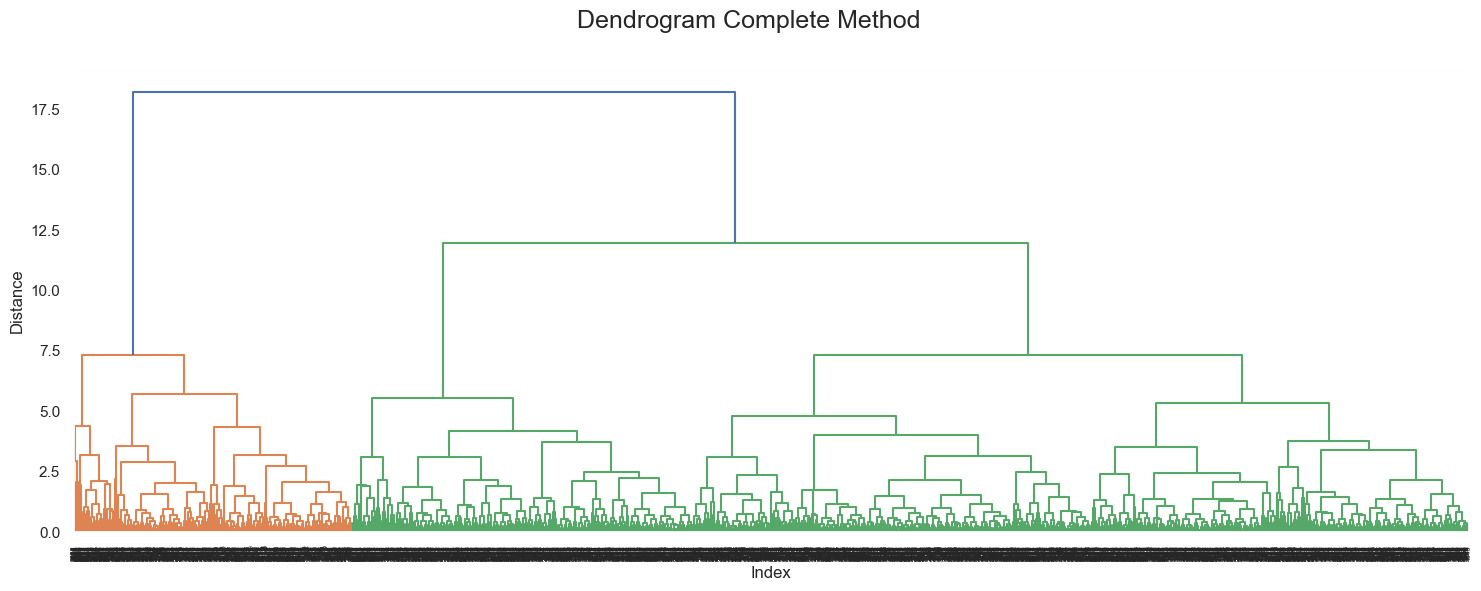

In [66]:
temp_single = linkage(df_PCA, method="complete")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

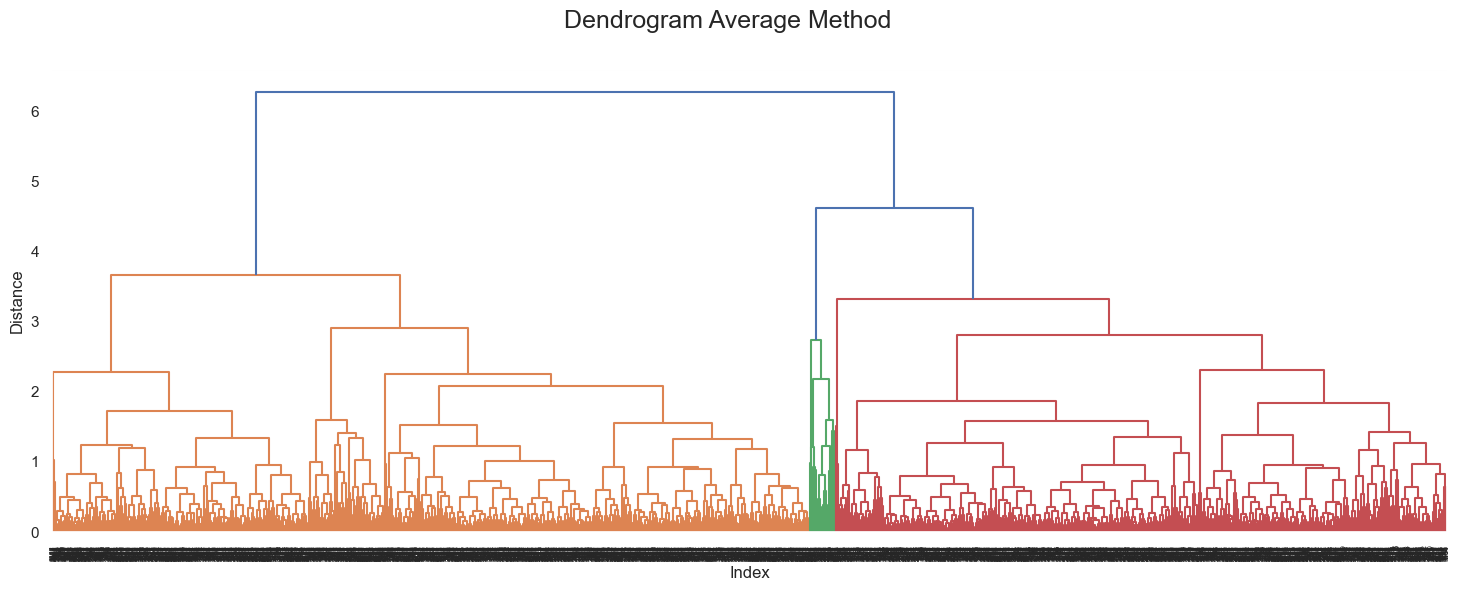

In [67]:
temp_single = linkage(df_PCA, method="average")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

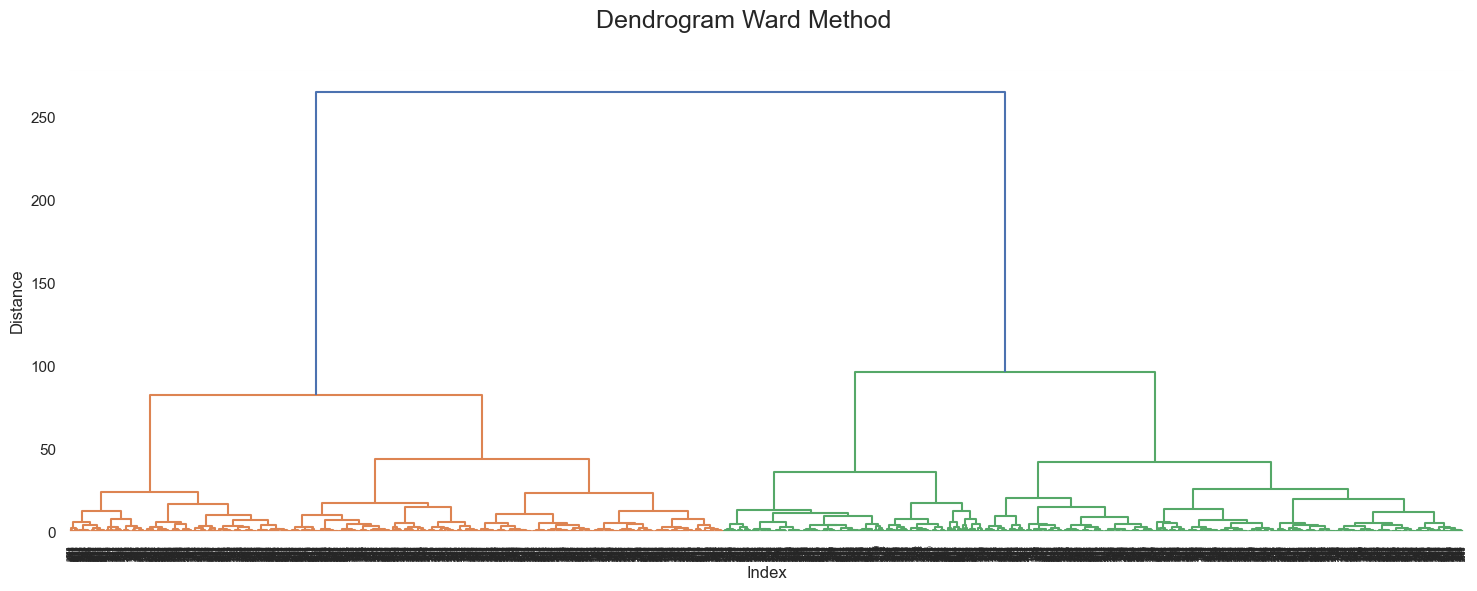

In [68]:
temp_single = linkage(df_PCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(temp_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()